In [ ]:
import pandas as pd
from tqdm import tqdm

import sklearn
print(sklearn.__version__)

0.20.2


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

def load_classifier(model_path):
    sk_model = joblib.load(model_path)
    return sk_model

In [ ]:
# LOAD MISTIC MODELS

dir_models = '/gstock/biolo_datasets/variation/benchmark/MISTIC/WEBSITE_DATA/MODELS/'
mistic_model_vc = 'MISTIC_VC.pkl'
mistic_model_lr = 'MISTIC_LR.pkl'
mistic_vc = load_classifier(dir_models + mistic_model_vc)
mistic_lr = load_classifier(dir_models + mistic_model_lr)

In [ ]:
dbnsfp_vcf_hail_pandas.CHROM.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X',
       'Y', 'M'], dtype=object)

In [ ]:
# LOAD TRAINING TO HAVE NO OVERLAP WITH TRAINING DATA & CLINVAR NEW

training_mistic = pd.read_csv('/gstock/biolo_datasets/variation/benchmark/MISTIC/WEBSITE_DATA/DATA_SCRIPT_PREPARE_TRAINING/MISTIC_training.csv.gz', sep='\t', compression='gzip')
training_features = pd.read_csv('/gstock/biolo_datasets/variation/benchmark/MISTIC/TRAINING_SETS/Features_training_sets.txt.gz', sep='\t', compression='gzip', names=['ID'])

In [ ]:
clinvar_mistic_old = pd.read_csv('/gstock/biolo_datasets/variation/benchmark/MISTIC/DATA/EVALUATION/DISEASE/VCF/clinvar_new_filtered.vcf.gz', compression='gzip', sep='\t', skiprows=252, nrows=500)
clinvar_mistic_old['ID'] = clinvar_mistic_old['#CHROM'].astype(str) + '_' + clinvar_mistic_old['POS'].astype(str) + '_' + clinvar_mistic_old['REF'].astype(str) + '_' + clinvar_mistic_old['ALT'].astype(str)
clinvar_mistic_old

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO
0,1,2160273,1_2160273_A_C,A,C,.,.,"ALLELEID=557155;CLNDISDB=MedGen:C1321551,OMIM:..."
1,1,12056235,1_12056235_G_A,G,A,.,.,"ALLELEID=578360;CLNDISDB=MedGen:C4310725,OMIM:..."
2,1,17594433,1_17594433_C_T,C,T,.,.,"ALLELEID=590371;CLNDISDB=MedGen:C1274708,OMIM:..."
3,1,17607199,1_17607199_C_T,C,T,.,.,"ALLELEID=590374;CLNDISDB=MedGen:C1274708,OMIM:..."
4,1,17609534,1_17609534_G_A,G,A,.,.,"ALLELEID=590376;CLNDISDB=MedGen:C1274708,OMIM:..."
...,...,...,...,...,...,...,...,...
430,X,153005654,X_153005654_A_C,A,C,.,.,"ALLELEID=612118;CLNDISDB=MedGen:C0162309,OMIM:..."
431,X,153993783,X_153993783_C_A,C,A,.,.,"ALLELEID=573737;CLNDISDB=MedGen:C0265965,Orpha..."
432,X,154124503,X_154124503_T_A,T,A,.,.,ALLELEID=610211;CLNDISDB=MedGen:CN517202;CLNDN...
433,X,154133255,X_154133255_G_A,G,A,.,.,ALLELEID=610218;CLNDISDB=MedGen:CN517202;CLNDN...


In [ ]:
# LOAD CLINVAR 2019 TO RETRIEV ONLY NEW VARIANTS

clinvar_2019 = pd.read_csv('/gstock/biolo_datasets/variation/variation_sets/clinvar/vcf_GRCh37/v2/clinvar_20190403.vcf.gz', compression='gzip', sep='\t', skiprows=27)
clinvar_2019 = clinvar_2019.loc[(clinvar_2019['INFO'].str.contains('CLNVC=single_nucleotide_variant')) & (clinvar_2019['INFO'].str.contains('missense_variant'))]
clinvar_2019['ID'] = clinvar_2019['#CHROM'].astype(str) + '_' + clinvar_2019['POS'].astype(str) + '_' + clinvar_2019['REF'].astype(str) + '_' + clinvar_2019['ALT'].astype(str)
clinvar_2019['CLNSIG'] = clinvar_2019['INFO'].apply(lambda r: [e.replace('CLNSIG=', '') for e in r.split(';') if 'CLNSIG=' in e])
clinvar_2019 = clinvar_2019.loc[clinvar_2019.CLNSIG.str.len() > 0]
clinvar_2019['CLNSIG'] = clinvar_2019['CLNSIG'].apply(lambda r: r[0])
clinvar_2019 = clinvar_2019.loc[(clinvar_2019['CLNSIG'].str.contains('athogenic')) & (~clinvar_2019['CLNSIG'].str.contains('onflict'))]
clinvar_2019


,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,CLNSIG
24,1,957605,1_957605_G_A,G,A,.,.,AF_EXAC=0.00001;ALLELEID=244110;CLNDISDB=MedGe...,Pathogenic
26,1,957693,1_957693_A_T,A,T,.,.,"ALLELEID=244111;CLNDISDB=MedGen:C0751882,Orpha...",Pathogenic
270,1,985853,1_985853_G_A,G,A,.,.,AF_EXAC=0.00003;ALLELEID=244113;CLNDISDB=MedGe...,Pathogenic
280,1,985955,1_985955_G_C,G,C,.,.,"ALLELEID=33280;CLNDISDB=MedGen:C0751882,Orphan...",Pathogenic
282,1,986143,1_986143_G_T,G,T,.,.,"ALLELEID=132068;CLNDISDB=MedGen:C0751882,Orpha...",Pathogenic
...,...,...,...,...,...,...,...,...,...
444460,NW_003315950.2,355570,NW_003315950.2_355570_C_T,C,T,.,.,"ALLELEID=152921;CLNDISDB=MedGen:C2749982,OMIM:...",Pathogenic
444461,NW_003315950.2,355653,NW_003315950.2_355653_G_A,G,A,.,.,"ALLELEID=152923;CLNDISDB=MedGen:C2749982,OMIM:...",Pathogenic
444462,NW_003315950.2,355749,NW_003315950.2_355749_G_C,G,C,.,.,"ALLELEID=152924;CLNDISDB=MedGen:C2749982,OMIM:...",Pathogenic
444464,NW_003315950.2,356212,NW_003315950.2_356212_C_T,C,T,.,.,"ALLELEID=15244;CLNDISDB=MedGen:C2749982,OMIM:1...","Pathogenic,_risk_factor"


In [ ]:
# LOAD CLINVAR 2021

clinvar_2021 = pd.read_csv('/gstock/biolo_datasets/variation/variation_sets/clinvar/vcf_GRCh37/v2/clinvar_20210731.vcf.gz', compression='gzip', sep='\t', skiprows=27,)
clinvar_2021 = clinvar_2021.loc[(clinvar_2021['INFO'].str.contains('CLNVC=single_nucleotide_variant')) & (clinvar_2021['INFO'].str.contains('missense_variant'))]
clinvar_2021['ID'] = clinvar_2021['#CHROM'].astype(str) + '_' + clinvar_2021['POS'].astype(str) + '_' + clinvar_2021['REF'].astype(str) + '_' + clinvar_2021['ALT'].astype(str)
clinvar_2021['CLNSIG'] = clinvar_2021['INFO'].apply(lambda r: [e.replace('CLNSIG=', '') for e in r.split(';') if 'CLNSIG=' in e])
clinvar_2021 = clinvar_2021.loc[clinvar_2021.CLNSIG.str.len() > 0]
clinvar_2021['CLNSIG'] = clinvar_2021['CLNSIG'].apply(lambda r: r[0])
clinvar_2021 = clinvar_2021.loc[(clinvar_2021['CLNSIG'].str.contains('athogenic')) & (~clinvar_2021['CLNSIG'].str.contains('onflict'))]
clinvar_2021


In [ ]:
# REMOVE VARIANTS IN 2021 THAT WERE ALREADY IN 2019

clinvar_2021_clean = clinvar_2021.loc[(~clinvar_2021['ID'].isin(clinvar_2019.ID.values.tolist())) & (~clinvar_2021['ID'].isin(training_mistic.ID.values.tolist())) & (~clinvar_2021['ID'].isin(training_features.ID.values.tolist()))]
clinvar_2021_clean['Gene'] = clinvar_2021['INFO'].apply(lambda r: [e.replace('GENEINFO=', '').split(':')[0] for e in r.split(';') if 'GENEINFO=' in e][0])
clinvar_2021_clean

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,CLNSIG
375,1,899892,1_899892_C_A,C,A,.,.,ALLELEID=904889;CLNDISDB=Human_Phenotype_Ontol...,Likely_pathogenic
1373,1,986655,1_986655_T_C,T,C,.,.,"ALLELEID=608899;CLNDISDB=MONDO:MONDO:0014052,M...",Likely_pathogenic
1632,1,1167660,1_1167660_T_A,T,A,.,.,"ALLELEID=1054735;CLNDISDB=MONDO:MONDO:0014139,...",Likely_pathogenic
1698,1,1168203,1_1168203_A_G,A,G,.,.,"ALLELEID=613455;CLNDISDB=MONDO:MONDO:0014139,M...",Pathogenic
1712,1,1168276,1_1168276_C_G,C,G,.,.,"ALLELEID=858244;CLNDISDB=MONDO:MONDO:0012282,M...",Pathogenic
...,...,...,...,...,...,...,...,...,...
969806,MT,14784,MT_14784_T_C,T,C,.,.,ALLELEID=153591;CLNDISDB=Human_Phenotype_Ontol...,Likely_pathogenic
969836,MT,14891,MT_14891_C_G,C,G,.,.,"ALLELEID=153593;CLNDISDB=MONDO:MONDO:0016419,M...",Likely_pathogenic
969961,MT,15349,MT_15349_C_A,C,A,.,.,"ALLELEID=153609;CLNDISDB=MONDO:MONDO:0016419,M...",Likely_pathogenic
969965,MT,15363,MT_15363_A_G,A,G,.,.,ALLELEID=153612;CLNDISDB=Human_Phenotype_Ontol...,Likely_pathogenic


In [ ]:
clinvar_2021_clean['#CHROM'].value_counts()

2     907
X     794
1     789
17    666
3     539
12    524
11    476
16    446
19    412
7     412
15    411
6     381
5     348
9     334
14    305
10    292
4     217
20    194
8     188
13    156
18    105
21     96
22     83
MT     55
22     48
Y       2
Name: #CHROM, dtype: int64

In [ ]:
# RETRIEVE FEATURES OF CLINVAR 2021 VARIANTS IN DBNSFP

chrs = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X']
l_df = list()
for chromosome in chrs:
    print(chromosome)
    dbnsfp_tmp = pd.read_csv('/gstock/biolo_datasets/variation/benchmark/Annot_datasets/dbNSFP/v4.2/dbNSFP4.2a_variant.chr{}.gz'.format(chromosome), compression='gzip', sep='\t', low_memory=False)
    dbnsfp_tmp['ID'] = dbnsfp_tmp['hg19_chr'].astype(str).replace('M', 'MT')  + '_' + dbnsfp_tmp['hg19_pos(1-based)'].astype(str)  + '_' + dbnsfp_tmp['ref'].astype(str) + '_' + dbnsfp_tmp['alt'].astype(str)
    mistic = pd.read_csv('/gstock/MISTIC/CAGI6/download/OUTPUT/MISTIC_chr{}.tsv'.format(chromosome), sep='\t')
    test = pd.merge(clinvar_2021_clean, dbnsfp_tmp, on ='ID')
    merge = pd.merge(test, mistic.rename({"score": "MISTIC_score"}, axis=1), on=['#chr', 'pos(1-based)', 'ref', 'alt'])
    l_df.append(merge)
l_df
# dbnsfp_tmp

1
2
3
4
5
6
7
8
9


In [ ]:

# RETRIEVE VARIANTS **WITHOUT** MAF

# t = pd.read_csv('/gstock/biolo_datasets/variation/benchmark/Annot_datasets/dbNSFP/v4.2/dbNSFP4.2a_variant.chr{}.gz'.format("21"), compression='gzip', sep='\t', low_memory=False, nrows=50000)

chrs = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X']
l_df_benign_nomaf = list()
for chromosome in chrs:
    print(chromosome)
    dbnsfp_tmp = pd.read_csv('/gstock/biolo_datasets/variation/benchmark/Annot_datasets/dbNSFP/v4.2/dbNSFP4.2a_variant.chr{}.gz'.format(chromosome), compression='gzip', sep='\t', low_memory=False, nrows=100000)
    dbnsfp_tmp['ID'] = dbnsfp_tmp['hg19_chr'].astype(str).replace('M', 'MT')  + '_' + dbnsfp_tmp['hg19_pos(1-based)'].astype(str)  + '_' + dbnsfp_tmp['ref'].astype(str) + '_' + dbnsfp_tmp['alt'].astype(str)
    dbnsfp_tmp = dbnsfp_tmp.loc[dbnsfp_tmp['gnomAD_exomes_AF'] == '.'] 
    dbnsfp_tmp = dbnsfp_tmp.sample(frac=1).head(1000)
    mistic = pd.read_csv('/gstock/MISTIC/CAGI6/download/OUTPUT/MISTIC_chr{}.tsv'.format(chromosome), sep='\t')
#     test = pd.merge(clinvar_2021_clean, dbnsfp_tmp, on ='ID')
    merge = pd.merge(dbnsfp_tmp, mistic.rename({"score": "MISTIC_score"}, axis=1), on=['#chr', 'pos(1-based)', 'ref', 'alt'])
    l_df_benign_nomaf.append(merge)
# l_df_benign_nomaf
# dbnsfp_tmp

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
X


In [ ]:
# RETRIEVE VARIANTS **WITH** MAF

# t = pd.read_csv('/gstock/biolo_datasets/variation/benchmark/Annot_datasets/dbNSFP/v4.2/dbNSFP4.2a_variant.chr{}.gz'.format("21"), compression='gzip', sep='\t', low_memory=False, nrows=50000)

chrs = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X']
l_df_benign_maf = list()
for chromosome in chrs:
    print(chromosome)
    dbnsfp_tmp = pd.read_csv('/gstock/biolo_datasets/variation/benchmark/Annot_datasets/dbNSFP/v4.2/dbNSFP4.2a_variant.chr{}.gz'.format(chromosome), compression='gzip', sep='\t', low_memory=False, nrows=100000)
    dbnsfp_tmp['ID'] = dbnsfp_tmp['hg19_chr'].astype(str).replace('M', 'MT')  + '_' + dbnsfp_tmp['hg19_pos(1-based)'].astype(str)  + '_' + dbnsfp_tmp['ref'].astype(str) + '_' + dbnsfp_tmp['alt'].astype(str)
    dbnsfp_tmp = dbnsfp_tmp.loc[dbnsfp_tmp['gnomAD_exomes_AF'] != '.'] 
    dbnsfp_tmp = dbnsfp_tmp.sample(frac=1).head(1000)
    mistic = pd.read_csv('/gstock/MISTIC/CAGI6/download/OUTPUT/MISTIC_chr{}.tsv'.format(chromosome), sep='\t')
#     test = pd.merge(clinvar_2021_clean, dbnsfp_tmp, on ='ID')
    merge = pd.merge(dbnsfp_tmp, mistic.rename({"score": "MISTIC_score"}, axis=1), on=['#chr', 'pos(1-based)', 'ref', 'alt'])
    l_df_benign_maf.append(merge)
l_df_benign_maf
# dbnsfp_tmp

In [ ]:
# CONCAT VARIANTS WITHOUT MAF

concat_benign_nomaf = pd.concat(l_df_benign_nomaf).reset_index(drop=True)
concat_benign_nomaf = concat_benign_nomaf.loc[~concat_benign_nomaf['ID'].isin(clinvar_2021.ID.values.tolist())]
concat_benign_nomaf = concat_benign_nomaf.sample(frac=1).head(concat_df.shape[0])
concat_benign_nomaf['True_Label'] = 0
concat_benign_nomaf.genename.value_counts()
# concat_benign

CSMD1;CSMD1;CSMD1;CSMD1;CSMD1;CSMD1    84
MXRA5                                  74
TEP1;TEP1                              71
SACS;SACS                              65
INTS1                                  63
                                       ..
COLEC11                                 1
TRIB3                                   1
PTBP1                                   1
MYT1L;MYT1L                             1
AKAIN1;AKAIN1                           1
Name: genename, Length: 1377, dtype: int64

In [ ]:
# CONCAT VARIANTS WITH MAF

concat_benign_maf = pd.concat(l_df_benign_maf).reset_index(drop=True)
concat_benign_maf = concat_benign_maf.loc[~concat_benign_maf['ID'].isin(clinvar_2021.ID.values.tolist())]
concat_benign_maf = concat_benign_maf.sample(frac=1).head(concat_df.shape[0])
concat_benign_maf['True_Label'] = 0
concat_benign_maf.genename.value_counts()
# concat_benign

CSMD1;CSMD1;CSMD1;CSMD1;CSMD1;CSMD1                               98
MXRA5                                                             94
SACS;SACS                                                         87
TEP1;TEP1                                                         69
NRIP1;NRIP1;NRIP1                                                 52
                                                                  ..
ZNF596;ZNF596;ZNF596;ZNF596;ZNF596;ZNF596;ZNF596                   1
GYG2;GYG2;GYG2                                                     1
CCNB1IP1;CCNB1IP1;CCNB1IP1;CCNB1IP1;CCNB1IP1;CCNB1IP1;CCNB1IP1     1
TPO                                                                1
DUSP22;DUSP22                                                      1
Name: genename, Length: 1320, dtype: int64

In [ ]:
concat_df = pd.concat(l_df).reset_index(drop=True)
concat_df['True_Label'] = 1
concat_df

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,CLNSIG,Gene,...,clinvar_Orphanet_id,Interpro_domain,GTEx_V8_gene,GTEx_V8_tissue,Geuvadis_eQTL_target_gene,MISTIC_score,sd,pred,comments,True_Label
0,1,899892,1_899892_C_A,C,A,.,.,ALLELEID=904889;CLNDISDB=Human_Phenotype_Ontol...,Likely_pathogenic,KLHL17,...,ORPHA1199,.,.,.,.,0.655310,0,D,A/E,1
1,1,986655,1_986655_T_C,T,C,.,.,"ALLELEID=608899;CLNDISDB=MONDO:MONDO:0014052,M...",Likely_pathogenic,AGRN,...,.,.;Laminin G domain|Laminin G domain|Laminin G ...,.,.,.,0.925520,0,D,L/P,1
2,1,1167660,1_1167660_T_A,T,A,.,.,"ALLELEID=1054735;CLNDISDB=MONDO:MONDO:0014139,...",Likely_pathogenic,B3GALT6,...,.,.;.,.,.,.,0.247669,0,T,M/K,1
3,1,1168203,1_1168203_A_G,A,G,.,.,"ALLELEID=613455;CLNDISDB=MONDO:MONDO:0014139,M...",Pathogenic,B3GALT6,...,.,.;.,.,.,.,0.514210,0,D,Y/C,1
4,1,1168276,1_1168276_C_G,C,G,.,.,"ALLELEID=858244;CLNDISDB=MONDO:MONDO:0012282,M...",Pathogenic,B3GALT6,...,ORPHA2725,.;.,.,.,.,0.655550,0,D,C/W,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9459,X,154225340,X_154225340_A_G,A,G,.,.,"ALLELEID=982333;CLNDISDB=MONDO:MONDO:0010602,M...",Pathogenic,F8,...,ORPHA98878,"Multicopper oxidase, type 3;Multicopper oxidas...",.,.,.,0.788720,0,D,V/A,1
9460,X,154227757,X_154227757_T_C,T,C,.,.,"ALLELEID=1163959;CLNDISDB=MONDO:MONDO:0010602,...",Likely_pathogenic,F8,...,.,.;.;.,.,.,.,0.730600,0,D,M/V,1
9461,X,154227800,X_154227800_G_C,G,C,.,.,"ALLELEID=800301;CLNDISDB=MONDO:MONDO:0010602,M...",Likely_pathogenic,F8,...,ORPHA98878,.;.;.,.,.,.,0.954900,0,D,F/L,1
9462,X,154493385,X_154493385_C_A,C,A,.,.,"ALLELEID=621997;CLNDISDB=MeSH:D065886,MedGen:C...",Likely_pathogenic,RAB39B,...,.,Small GTP-binding protein domain,.,.,.,0.956150,0,D,W/C,1


In [ ]:
concat_benign.columns.tolist()

In [ ]:
algos = ['MISTIC_score', 'ClinPred_score', 'M-CAP_score', 'REVEL_score', 'MetaRNN_score', 'LIST-S2_score', ]
algos_transcripts = ['MetaRNN_score', 'LIST-S2_score',]

In [ ]:
concat_final_evaluation_nomaf = pd.concat([concat_benign_nomaf, concat_df], axis=0)[['True_Label'] + algos].replace('.', np.nan).dropna()
for col in algos_transcripts: 
    concat_final_evaluation_nomaf[col] = concat_final_evaluation_nomaf[col].apply(lambda r: np.mean([float(e) for e in r.split(';') if e not in ['.', '', None, np.nan]]))
concat_final_evaluation_nomaf = concat_final_evaluation_nomaf.astype(float)
concat_final_evaluation_nomaf = concat_final_evaluation_nomaf.dropna()

concat_final_evaluation_nomaf

[WARNING] /home/weber/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

  out=out, **kwargs)



,True_Label,MISTIC_score,ClinPred_score,M-CAP_score,REVEL_score,MetaRNN_score,LIST-S2_score
19069,0.0,0.105420,0.046535,0.056296,0.036,0.093184,0.317668
18100,0.0,0.034293,0.075312,0.011020,0.011,0.043983,0.309269
10803,0.0,0.028991,0.296886,0.014003,0.083,0.133062,0.738626
4249,0.0,0.045724,0.152931,0.009799,0.062,0.072201,0.400260
6231,0.0,0.827370,0.997317,0.187475,0.670,0.812753,0.962124
...,...,...,...,...,...,...,...
9459,1.0,0.788720,0.970476,0.812961,0.697,0.708922,0.743659
9460,1.0,0.730600,0.910860,0.900798,0.783,0.631465,0.879212
9461,1.0,0.954900,0.988769,0.651750,0.813,0.979572,0.715628
9462,1.0,0.956150,0.999696,0.913763,0.914,0.991677,0.989876


In [ ]:
concat_benign_maf = concat_benign

concat_final_evaluation_maf = pd.concat([concat_benign_maf, concat_df], axis=0)[['True_Label'] + algos].replace('.', np.nan).dropna()
for col in algos_transcripts: 
    concat_final_evaluation_maf[col] = concat_final_evaluation_maf[col].apply(lambda r: np.mean([float(e) for e in r.split(';') if e not in ['.', '', None, np.nan]]))
concat_final_evaluation_maf = concat_final_evaluation_maf.astype(float)
concat_final_evaluation_maf = concat_final_evaluation_maf.dropna()
concat_final_evaluation_maf

[WARNING] /home/weber/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

  out=out, **kwargs)



,True_Label,MISTIC_score,ClinPred_score,M-CAP_score,REVEL_score,MetaRNN_score,LIST-S2_score
21456,0.0,0.116990,0.938002,0.010515,0.087,0.272033,0.867163
22846,0.0,0.044784,0.025841,0.017458,0.190,0.089237,0.652935
7039,0.0,0.073920,0.887471,0.021182,0.265,0.423564,0.926107
19222,0.0,0.085669,0.137356,0.019246,0.126,0.234016,0.608739
11584,0.0,0.529330,0.716444,0.184604,0.701,0.973468,0.867713
...,...,...,...,...,...,...,...
9459,1.0,0.788720,0.970476,0.812961,0.697,0.708922,0.743659
9460,1.0,0.730600,0.910860,0.900798,0.783,0.631465,0.879212
9461,1.0,0.954900,0.988769,0.651750,0.813,0.979572,0.715628
9462,1.0,0.956150,0.999696,0.913763,0.914,0.991677,0.989876


In [ ]:
concat_final_evaluation_maf.True_Label.value_counts()

1.0    8846
0.0    7939
Name: True_Label, dtype: int64

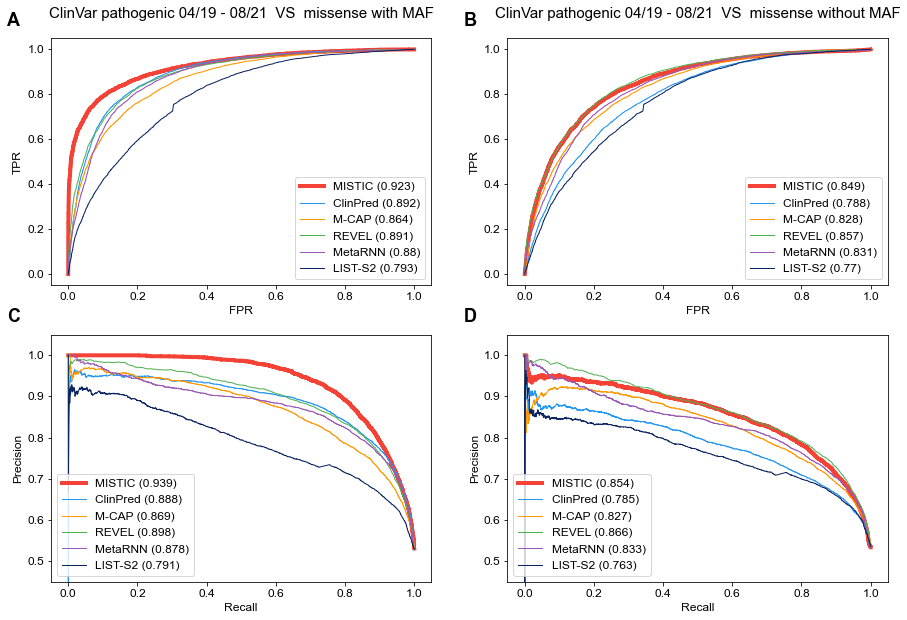

In [ ]:
from sklearn import datasets, metrics, model_selection, svm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import collections
import matplotlib.font_manager as font_manager

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.weight'] = 'light'
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 12

custom_lines = list()
custom_labels = list()

f, ax = plt.subplots(figsize=(15,10),nrows=2,ncols=2)


color_dict = {algo.replace('_score', ''): sns.color_palette('Dark2')[j] for j, algo in enumerate(algos)}
color_dict['MISTIC'] = 'red'

color_dict = {
	'ClinPred': '#2196F3',
	'M-CAP': '#FF9800',
	'MetaRNN': '#9b59b6',
# 	'MetaRNN': '#9C27B0',
	'CADD': '#9C27B0',
	'MetaSVM': '#673AB7',
	'REVEL': '#4CAF50',
	'DEOGEN2': '#34495e',
# 	'MetaRNN': '#22a6b3',
	'LIST-S2': '#0c2461',
	'MISTIC': '#f44336',
	'InMeRF': '#0c2461',
	'VotingClassifier': '#f44336',
	'LogisticRegression': '#e57373',
	'RandomForestClassifier': '#f44336',
	'GradientBoostingClassifier': '#9b59b6',
	'GaussianNB': '#22a6b3',
	'MLPClassifier': '#0c2461',
	'Gnomad_Alone': '#f44336',
	'Clinvar_Alone': '#f44336',
	'gnomAD_global_MAF': '#gnomAD_global_MAF',
	'Multi_ethnics_gnomAD_MAF': '#Multi_ethnics_gnomAD_MAF',
}


for algo in algos:

    fpr, tpr, thresholds = metrics.roc_curve(concat_final_evaluation_maf['True_Label'].values, concat_final_evaluation_maf[algo].values)
    auc = metrics.roc_auc_score(concat_final_evaluation_maf['True_Label'].values, concat_final_evaluation_maf[algo].values)
    if 'MISTIC' in algo: 
        lw = 4
    else:
        lw = 1
    ax[0][0].plot(fpr, tpr,color=color_dict[algo.replace('_score', '').replace('_coding', '')], lw=lw)
    custom_lines.append(Line2D([0], [0], color=color_dict[algo.replace('_score', '').replace('_coding', '')], lw=lw))
    custom_labels.append('{} ('.format(algo.replace('_score', '').replace('_coding', '')) + str(round(auc, 3)) + ')')
ax[0][0].set_xlim([-0.05, 1.05])
ax[0][0].set_ylim([-0.05, 1.05])
ax[0][0].set_xlabel('FPR')
ax[0][0].set_ylabel('TPR')
ax[0][0].legend(custom_lines, custom_labels, loc='lower right')
# ax[0][0].grid()


custom_lines = list()
custom_labels = list()

for algo in algos:

    fpr, tpr, thresholds = metrics.precision_recall_curve(concat_final_evaluation_maf['True_Label'].values, concat_final_evaluation_maf[algo].values)
    auc = metrics.average_precision_score(concat_final_evaluation_maf['True_Label'].values, concat_final_evaluation_maf[algo].values)
    if 'MISTIC' in algo: 
        lw = 4
    else:
        lw = 1
    ax[1][0].plot(tpr, fpr,color=color_dict[algo.replace('_score', '').replace('_coding', '')], lw=lw)
    custom_lines.append(Line2D([0], [0], color=color_dict[algo.replace('_score', '').replace('_coding', '')], lw=lw))
    custom_labels.append('{} ('.format(algo.replace('_score', '').replace('_coding', '')) + str(round(auc, 3)) + ')')
ax[1][0].set_xlim([-0.05, 1.05])
ax[1][0].set_ylim([0.45, 1.05])
ax[1][0].set_xlabel('Recall')
ax[1][0].set_ylabel('Precision')
ax[1][0].legend(custom_lines, custom_labels, loc='lower left')
# ax[1][0].grid()


custom_lines = list()
custom_labels = list()


for algo in algos:

    fpr, tpr, thresholds = metrics.roc_curve(concat_final_evaluation_nomaf['True_Label'].values, concat_final_evaluation_nomaf[algo].values)
    auc = metrics.roc_auc_score(concat_final_evaluation_nomaf['True_Label'].values, concat_final_evaluation_nomaf[algo].values)
    if 'MISTIC' in algo: 
        lw = 4
    else:
        lw = 1
    ax[0][1].plot(fpr, tpr,color=color_dict[algo.replace('_score', '').replace('_coding', '')], lw=lw)
    custom_lines.append(Line2D([0], [0], color=color_dict[algo.replace('_score', '').replace('_coding', '')], lw=lw))
    custom_labels.append('{} ('.format(algo.replace('_score', '').replace('_coding', '')) + str(round(auc, 3)) + ')')
ax[0][1].set_xlim([-0.05, 1.05])
ax[0][1].set_ylim([-0.05, 1.05])
ax[0][1].set_xlabel('FPR')
ax[0][1].set_ylabel('TPR')
ax[0][1].legend(custom_lines, custom_labels, loc='lower right')
# ax[0][1].grid()


custom_lines = list()
custom_labels = list()

for algo in algos:

    fpr, tpr, thresholds = metrics.precision_recall_curve(concat_final_evaluation_nomaf['True_Label'].values, concat_final_evaluation_nomaf[algo].values)
    auc = metrics.average_precision_score(concat_final_evaluation_nomaf['True_Label'].values, concat_final_evaluation_nomaf[algo].values)
    if 'MISTIC' in algo: 
        lw = 4
    else:
        lw = 1
    ax[1][1].plot(tpr, fpr,color=color_dict[algo.replace('_score', '').replace('_coding', '')], lw=lw)
    custom_lines.append(Line2D([0], [0], color=color_dict[algo.replace('_score', '').replace('_coding', '')], lw=lw))
    custom_labels.append('{} ('.format(algo.replace('_score', '').replace('_coding', '')) + str(round(auc, 3)) + ')')
ax[1][1].set_xlim([-0.05, 1.05])
ax[1][1].set_ylim([0.45, 1.05])
ax[1][1].set_xlabel('Recall')
ax[1][1].set_ylabel('Precision')
ax[1][1].legend(custom_lines, custom_labels, loc='lower left')
# ax[1][1].grid()

ax[0][0].set_title('ClinVar pathogenic 04/19 - 08/21  VS  missense with MAF', fontsize=15, pad=20, )
ax[0][1].set_title('ClinVar pathogenic 04/19 - 08/21  VS  missense without MAF', fontsize=15, pad=20, )

import string
i = 0
for n, a in enumerate(ax):
    for sub_a in a:
        sub_a.text(-0.115, 1.05, string.ascii_uppercase[i], transform=sub_a.transAxes, size=18, weight='bold')
        i += 1

f.savefig('benchmark_mistic.png', dpi=600)

In [ ]:
pd.concat(l_df).reset_index(drop=True).to_csv('/gstock/MISTIC/ClinVar_New_2021/clinvar_new_dbnsfp.csv.gz', compression='gzip', sep='\t', index=False)